**Author**: J W Debelius<br/>
**Date**: 27 April 2015<br/>
**virtualenv**: Playground

In [93]:
import numpy as np
import pandas as pd
import skbio
import scipy

from skbio.stats.power import subsample_power

import americangut.power_plots as pp

import matplotlib.pyplot as plt

%matplotlib inline

I'm seeing a lot of inconsistency in my data and effect size. So, I'm going to try to simulate the problem with two normal distributions.

In [10]:
dist1 = np.random.randn(1000)*5 + 28
dist2 = np.random.randn(1000)*5 + 32

In [11]:
samp1 = np.random.choice(dist1, 40)
samp2 = np.random.choice(dist2, 125)

In [14]:
print samp1.mean().round(1), samp1.std().round(1)
print samp2.mean().round(1), samp2.std().round(1)

28.0 4.5
32.5 4.4


In [17]:
# Checks there's a signifgiant difference in the underlying populations using a kruskal wallis test
scipy.stats.kruskal(*[samp1, samp2])[1]

1.597899642846023e-06

In [30]:
def test_kruskal(alpha):
    return scipy.stats.kruskal(*alpha)[1]

In [ ]:
counts_10_10 = []
powers_10_10 = []
stats_10_10 = []
for i in xrange(10):
    s2 = np.random.choice(samp2, len(samp1))
    pwr, cnts = subsample_power(test=test_kruskal,
                                samples=[samp1, s2],
                                min_counts=5,
                                max_counts=35,
                                num_runs=10)      
    stats_10_10.append(test_kruskal([samp1, samp2]))
    counts_10_10.append(cnts)
    powers_10_10.append(pwr)

In [ ]:
counts_100_10 = []
powers_100_10 = []
stats_100_10 = []
for i in xrange(10):
    s2 = np.random.choice(samp2, len(samp1))
    pwr, cnts = subsample_power(test=test_kruskal,
                                samples=[samp1, s2],
                                min_counts=5,
                                max_counts=35,
                                num_runs=100)      
    stats_100_10.append(test_kruskal([samp1, samp2]))
    counts_100_10.append(cnts)
    powers_100_10.append(pwr)

In [ ]:
counts_1000_10 = []
powers_1000_10 = []
stats_1000_10 = []
for i in xrange(10):
    s2 = np.random.choice(samp2, len(samp1))
    pwr, cnts = subsample_power(test=test_kruskal,
                                samples=[samp1, s2],
                                min_counts=5,
                                max_counts=35,
                                num_runs=1000)      
    stats_1000_10.append(test_kruskal([samp1, samp2]))
    counts_1000_10.append(cnts)
    powers_1000_10.append(pwr)

In [88]:
eff_m10_10,   eff_b10_10 = pp.collate_effect_size(counts_10_10, powers_10_10, alpha=0.05)
eff_m100_10,  eff_b100_10 = pp.collate_effect_size(counts_100_10, powers_100_10, alpha=0.05)
eff_m1000_10, eff_b1000_10 = pp.collate_effect_size(counts_1000_10, powers_1000_10, alpha=0.05)
print 'nan: ', sum(np.isnan(eff_m10))
print 'min: ', np.nanmin(eff_m10)
print 'mean: ', np.nanmean(eff_m10)
print 'max: ', np.nanmax(eff_m10)

nan:  0
min:  0.420791553273
mean:  0.733190515454
max:  0.981634391738


In [89]:
counts_10_100 = []
powers_10_100 = []
stats_10_100 = []
for i in xrange(100):
    s2 = np.random.choice(samp2, len(samp1))
    pwr, cnts = subsample_power(test=test_kruskal,
                                samples=[samp1, s2],
                                min_counts=5,
                                num_runs=10,
                                max_counts=35)      
    stats_10_100.append(test_kruskal([samp1, samp2]))
    counts_10_100.append(cnts)
    counts_10_100.append(pwr)

In [90]:
eff_m100, eff_b100 = pp.collate_effect_size(counts_100, powers_100, alpha=0.05)
print 'nan: ', sum(np.isnan(eff_m100))
print 'min: ', np.nanmin(eff_m100)
print 'mean: ', np.nanmean(eff_m100)
print 'max: ', np.nanmax(eff_m100)

nan:  4
min:  0.349985363564
mean:  0.775085429346
max:  0.9955530079


In [91]:
counts_1000 = []
powers_1000 = []
stats_1000 = []
for i in xrange(1000):
    s2 = np.random.choice(samp2, len(samp1))
    pwr, cnts = subsample_power(test=test_kruskal,
                                samples=[samp1, s2],
                                min_counts=5,
                                num_runs=10,
                                max_counts=35)      
    stats_1000.append(test_kruskal([samp1, samp2]))
    counts_1000.append(cnts)
    powers_1000.append(pwr)

In [92]:
eff_m1000, eff_b1000 = pp.collate_effect_size(counts_1000, powers_1000, alpha=0.05)
print 'nan: ', sum(np.isnan(eff_m1000))
print 'min: ', np.nanmin(eff_m1000)
print 'mean: ', np.nanmean(eff_m1000)
print 'max: ', np.nanmax(eff_m1000)

nan:  35
min:  0.292578120607
mean:  0.775821378666
max:  0.998086055863


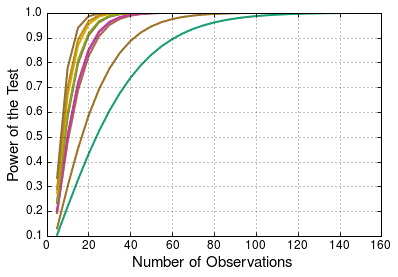

In [113]:
eff_m10.sort()
fig = pp.plot_effects(eff_m10, None, np.arange(0, 10), np.hstack((np.array([2]), np.arange(5, 150, 5))))
ax_ = fig.get_axes()[2]
leg = ax_.get_legend()
leg.set_visible(False)

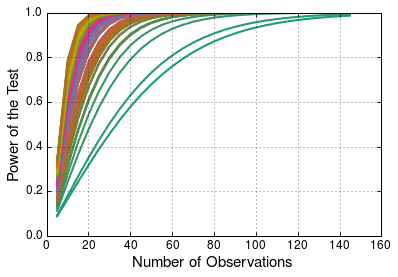

In [110]:
eff_m100.sort()
fig = pp.plot_effects(eff_m100, None, np.arange(0, 100), np.hstack((np.array([2]), np.arange(5, 150, 5))))
ax_ = fig.get_axes()[2]
leg = ax_.get_legend()
leg.set_visible(False)

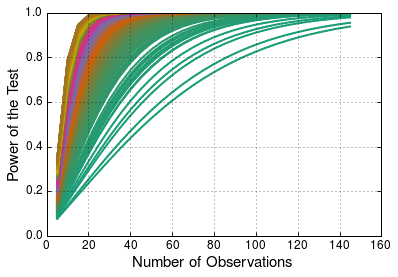

In [112]:
eff_m1000.sort()
fig = pp.plot_effects(eff_m1000, None, np.arange(0, 1000), np.hstack((np.array([2]), np.arange(5, 150, 5))))
ax_ = fig.get_axes()[2]
leg = ax_.get_legend()
leg.set_visible(False)